### **Car Insurance Customer Live Time Value (CLV)**

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

#### **Context**
Dataset ini berasal dari industri asuransi kendaraan, dengan target variabel berupa Customer Lifetime Value (CLV). CLV adalah metrik yang menunjukkan total nilai keuntungan yang diperoleh perusahaan dari satu pelanggan sepanjang masa hubungan mereka.
- Tujuan Utama: Membuat model prediksi untuk memperkirakan CLV pelanggan baru berdasarkan karakteristik pelanggan yang sudah ada di dataset.
- Kenapa Penting?
  - Membantu perusahaan mengalokasikan anggaran marketing secara lebih efisien.
  - Mengetahui pelanggan bernilai tinggi sehingga bisa diberikan layanan atau promo khusus.
  - Memproyeksikan pendapatan jangka panjang.

#### **Problem Statement**
1. **Bisnis Butuh Solusi untuk Optimalisasi Profit:**
   Perusahaan ingin memahami pelanggan mana yang memberikan kontribusi finansial terbesar melalui CLV. Ini penting untuk:
   - Menentukan prioritas pelanggan yang layak mendapatkan layanan premium.
   - Mengurangi biaya dengan fokus pada segmen pelanggan yang bernilai tinggi.
2. **Efisiensi Alokasi Marketing:**
   Perusahaan membutuhkan model prediksi untuk membantu menentukan anggaran marketing yang optimal, sehingga lebih fokus pada pelanggan yang berpotensi menghasilkan CLV tinggi.
3. **Strategi Jangka Panjang:**
   Dengan memprediksi CLV, perusahaan dapat memproyeksikan pendapatan di masa depan dan mengembangkan strategi retensi pelanggan yang lebih efektif.

### Data Understanding

In [115]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer





import warnings
warnings.filterwarnings('ignore')

# Load the dataset to analyze its structure and contents
file_path = 'data/data_customer_lifetime_value.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary to understand the data
data_info = {
    "head": data.head(),
    "info": data.info(),
    "description": data.describe(),
    "columns": data.columns.tolist()
}

data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


{'head':    Vehicle Class  Coverage Renew Offer Type EmploymentStatus Marital Status  \
 0  Four-Door Car  Extended           Offer1          Retired       Divorced   
 1  Four-Door Car     Basic           Offer1         Employed        Married   
 2   Two-Door Car     Basic           Offer1          Retired        Married   
 3  Four-Door Car   Premium           Offer3         Disabled        Married   
 4   Two-Door Car     Basic           Offer3    Medical Leave        Married   
 
               Education  Number of Policies  Monthly Premium Auto  \
 0  High School or Below                 2.0                  90.0   
 1               College                 6.0                  62.0   
 2                Master                 2.0                  62.0   
 3  High School or Below                 1.0                 116.0   
 4  High School or Below                 1.0                  62.0   
 
    Total Claim Amount   Income  Customer Lifetime Value  
 0          571.479602  11828

In [116]:
# Step 2: Data Understanding
# Load and explore the dataset to understand its structure, missing values, and basic statistics

# Overview of the dataset
data_overview = {
    "shape": data.shape,
    "columns": data.columns.tolist(),
    "missing_values": data.isnull().sum(),
    "data_types": data.dtypes,
    "summary_statistics": data.describe()
}

data_overview


{'shape': (5669, 11),
 'columns': ['Vehicle Class',
  'Coverage',
  'Renew Offer Type',
  'EmploymentStatus',
  'Marital Status',
  'Education',
  'Number of Policies',
  'Monthly Premium Auto',
  'Total Claim Amount',
  'Income',
  'Customer Lifetime Value'],
 'missing_values': Vehicle Class              0
 Coverage                   0
 Renew Offer Type           0
 EmploymentStatus           0
 Marital Status             0
 Education                  0
 Number of Policies         0
 Monthly Premium Auto       0
 Total Claim Amount         0
 Income                     0
 Customer Lifetime Value    0
 dtype: int64,
 'data_types': Vehicle Class               object
 Coverage                    object
 Renew Offer Type            object
 EmploymentStatus            object
 Marital Status              object
 Education                   object
 Number of Policies         float64
 Monthly Premium Auto       float64
 Total Claim Amount         float64
 Income                     float64
 C

In [117]:
display(data.head(), data.tail())

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940
5668,Luxury SUV,Basic,Offer2,Employed,Divorced,College,1.0,199.0,161.615740,60184.0,7664.219255


#### Attributes Information

| No | Attribute Name            | Data Type     | Description                                                   |
|----|---------------------------|---------------|---------------------------------------------------------------|
| 1  | Vehicle Class             | Categorical   | Kategori kendaraan pelanggan, misalnya "Four-Door Car".       |
| 2  | Coverage                  | Categorical   | Jenis perlindungan asuransi, seperti "Basic", "Premium".      |
| 3  | Renew Offer Type          | Categorical   | Tipe penawaran untuk pembaruan asuransi, seperti "Offer1".    |
| 4  | EmploymentStatus          | Categorical   | Status pekerjaan pelanggan, seperti "Employed", "Retired".    |
| 5  | Marital Status            | Categorical   | Status pernikahan pelanggan, seperti "Married", "Single".     |
| 6  | Education                 | Categorical   | Tingkat pendidikan pelanggan, seperti "College", "Master".    |
| 7  | Number of Policies        | Numerical     | Jumlah polis yang dimiliki pelanggan (1, 2, atau lebih).      |
| 8  | Monthly Premium Auto      | Numerical     | Premi bulanan yang dibayarkan pelanggan untuk asuransi.       |
| 9  | Total Claim Amount        | Numerical     | Total klaim yang diajukan pelanggan.                         |
| 10 | Income                    | Numerical     | Pendapatan pelanggan dalam satuan mata uang.                 |
| 11 | Customer Lifetime Value   | Numerical     | Target variabel; nilai total pelanggan bagi perusahaan.       |

#### Shape
Dataset memiliki 5669 baris dan 12 kolom

#### Kolom - Kolom Dalam Dataset
- Fitur Kategorikal (6):
  `Vehicle Class`, `Coverage`, `Renew Offer Type`, `EmploymentStatus`, `Marital Status`, `Education`.
- Fitur Numerik (6):
  `Number of Policies`, `Monthly Premium Auto`, `Total Claim Amount`, `Income`, `Customer Lifetime Value`, `Simulated CLV`.

#### Missing Values
Tidak ada nilai yang hilang dalam dataset (semua kolom memiliki data lengkap).


#### Descriptive Statistics (Numerik)
- Customer Lifetime Value (Target):
  - Rata-rata: 8029.87
  - Minimum: 1898.01
  - Maksimum: 83325.38
- Income:
  - Rata-rata: 37868.19
  - Minimum: 0.00 (ada pelanggan tanpa penghasilan).
  - Maksimum: 99934.00
- Monthly Premium Auto:
  - Rata-rata: 93.03
  - Minimum: 61.00
  - Maksimum: 297.00

### Exploratory Data Analysis (EDA)

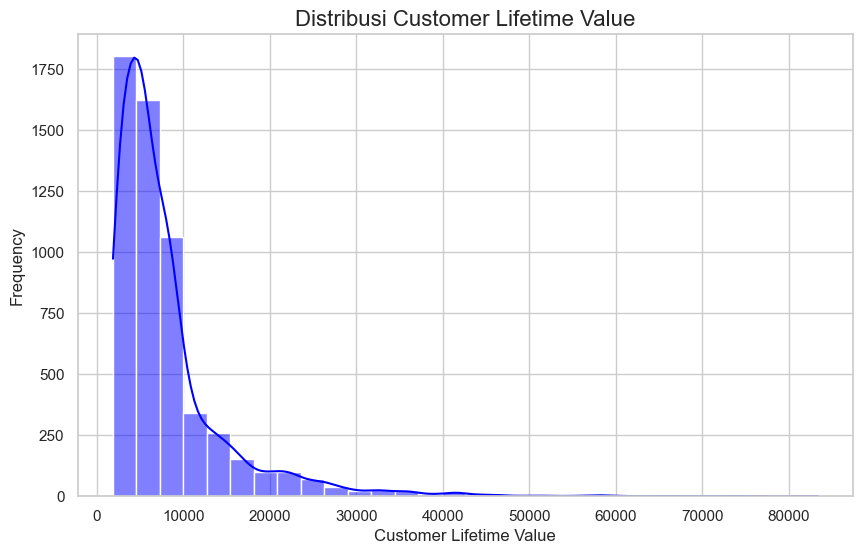

In [118]:
# Set general plot style
sns.set(style="whitegrid")

# Visualisasi distribusi Customer Lifetime Value
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer Lifetime Value'], kde=True, bins=30, color='blue')
plt.title("Distribusi Customer Lifetime Value", fontsize=16)
plt.xlabel("Customer Lifetime Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

- Distribusi CLV terlihat skewed ke kanan, yang artinya ada beberapa pelanggan dengan CLV sangat tinggi (outliers).
- Ini menunjukkan kita mungkin perlu melakukan log-transform atau scaling untuk menangani skewness sebelum modeling.

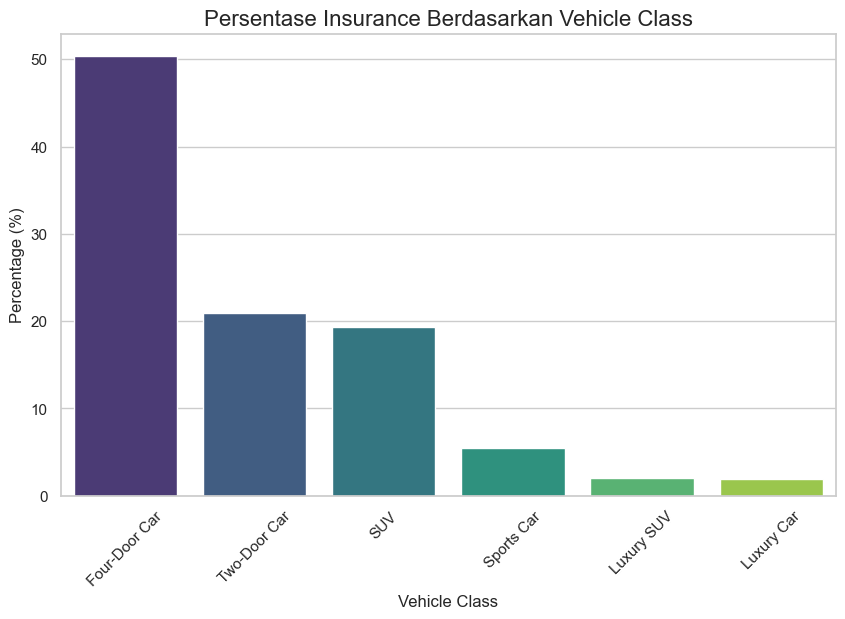

In [119]:
# Visualisasi 1: Persentase Insurance berdasarkan Vehicle Class
plt.figure(figsize=(10, 6))
vehicle_class_counts = data['Vehicle Class'].value_counts(normalize=True) * 100
sns.barplot(x=vehicle_class_counts.index, y=vehicle_class_counts.values, palette='viridis')
plt.title("Persentase Insurance Berdasarkan Vehicle Class", fontsize=16)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xlabel("Vehicle Class", fontsize=12)
plt.xticks(rotation=45)
plt.show()

- 50.4% pelanggan menggunakan asuransi untuk kendaraan jenis Four-Door Car.
- 20.9% pelanggan menggunakan asuransi untuk Two-Door Car.
- 19.3% pelanggan menggunakan asuransi untuk SUV.

Mayoritas pelanggan memiliki kendaraan Four-Door Car, yang bisa menjadi fokus utama perusahaan untuk menawarkan produk tambahan atau promo asuransi

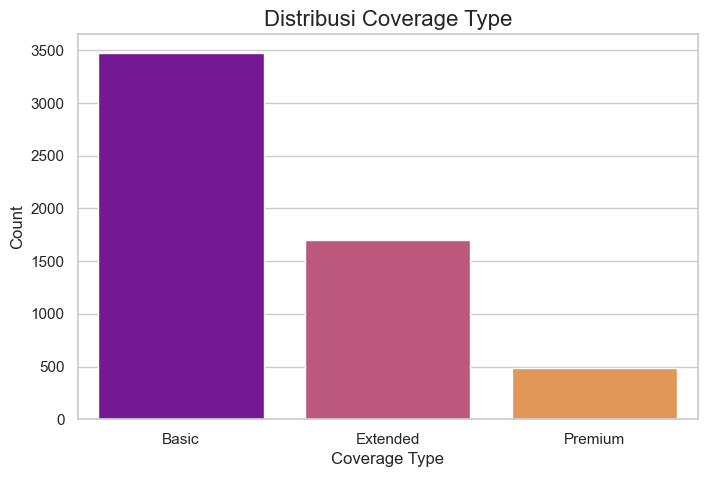

In [120]:
# Visualisasi 2: Distribusi Coverage Type
plt.figure(figsize=(8, 5))
coverage_counts = data['Coverage'].value_counts()
sns.barplot(x=coverage_counts.index, y=coverage_counts.values, palette='plasma')
plt.title("Distribusi Coverage Type", fontsize=16)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Coverage Type", fontsize=12)
plt.show()

- 59% pelanggan memilih perlindungan Basic.
- 29% pelanggan memilih perlindungan Extended.
- 12% pelanggan memilih perlindungan Premium.

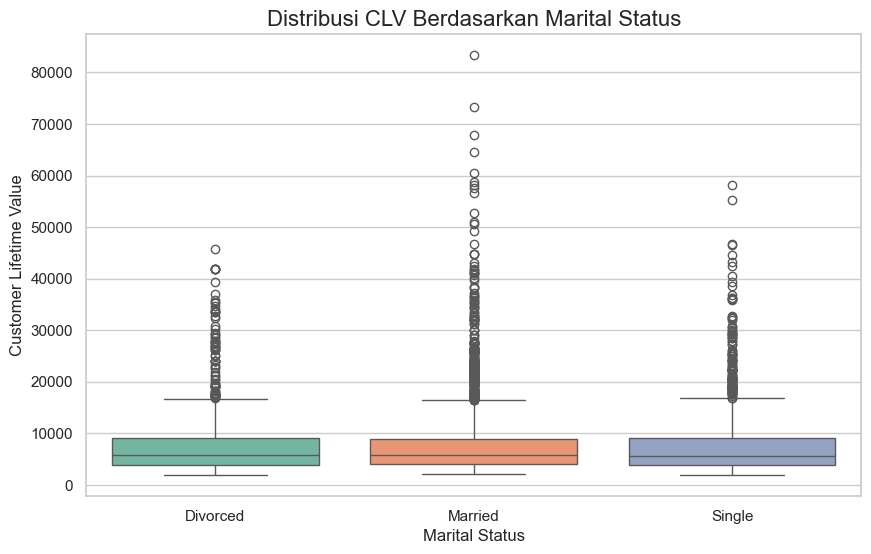

In [121]:
# Visualisasi 3: Boxplot CLV berdasarkan Marital Status
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Marital Status'], y=data['Customer Lifetime Value'], palette='Set2')
plt.title("Distribusi CLV Berdasarkan Marital Status", fontsize=16)
plt.ylabel("Customer Lifetime Value", fontsize=12)
plt.xlabel("Marital Status", fontsize=12)
plt.show()

- Pelanggan dengan status Married memiliki nilai CLV yang cenderung lebih tinggi dibandingkan status lainnya.
- Single dan Divorced memiliki distribusi CLV yang lebih rendah, dengan beberapa outliers.

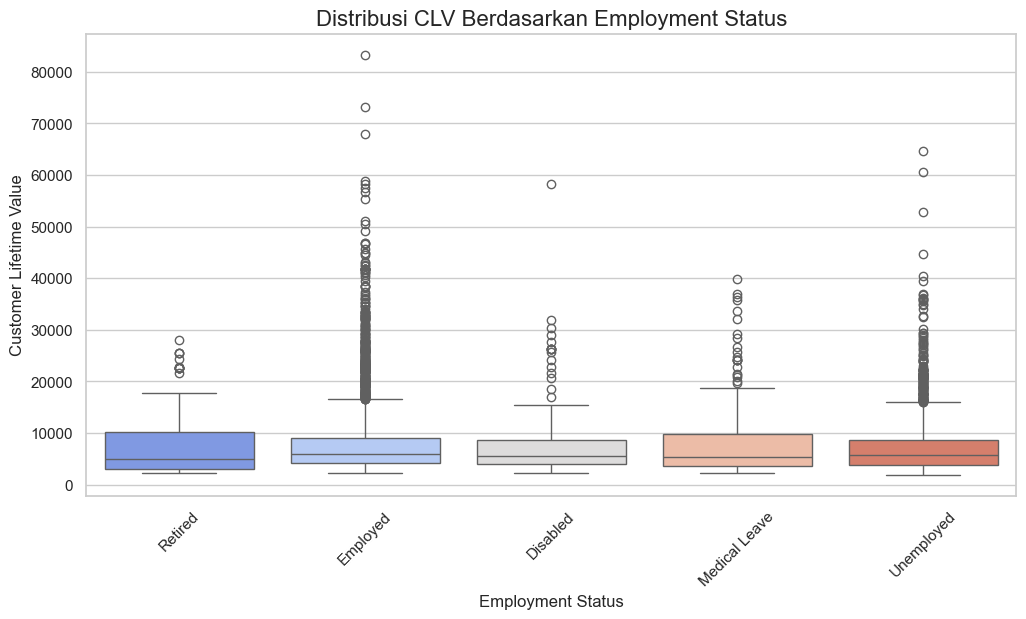

In [122]:
# Visualisasi 4: Distribusi CLV Berdasarkan Employment Status
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['EmploymentStatus'], y=data['Customer Lifetime Value'], palette='coolwarm')
plt.title("Distribusi CLV Berdasarkan Employment Status", fontsize=16)
plt.ylabel("Customer Lifetime Value", fontsize=12)
plt.xlabel("Employment Status", fontsize=12)
plt.xticks(rotation=45)
plt.show()

- Pelanggan yang Employed memiliki distribusi CLV tertinggi.
- Retired dan Medical Leave juga memiliki CLV cukup tinggi.
- Unemployed cenderung memiliki CLV yang lebih rendah.


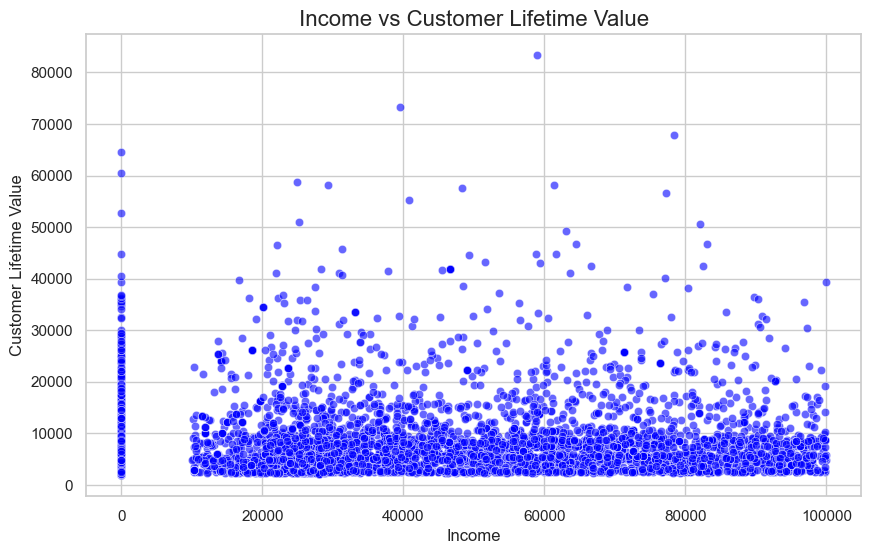

In [123]:
# Scatter plot: Income vs Customer Lifetime Value
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Income'], y=data['Customer Lifetime Value'], alpha=0.6, color='blue')
plt.title("Income vs Customer Lifetime Value", fontsize=16)
plt.xlabel("Income", fontsize=12)
plt.ylabel("Customer Lifetime Value", fontsize=12)
plt.show()

- Tidak ada pola hubungan yang jelas antara pendapatan dan CLV.
- Sebagian besar pelanggan dengan pendapatan 0 tetap memiliki CLV, artinya faktor lain selain pendapatan memengaruhi CLV.

Pendapatan pelanggan tidak terlalu relevan untuk memprediksi CLV

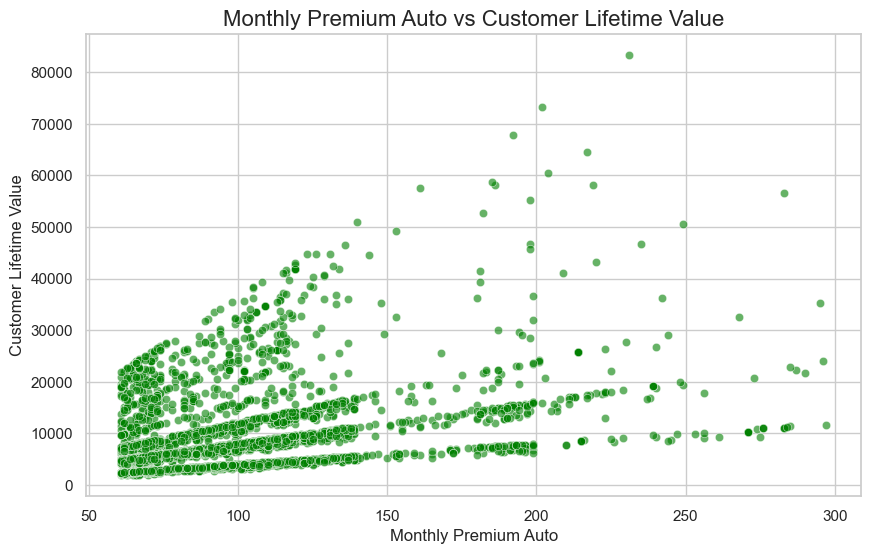

In [124]:
# Scatter plot: Monthly Premium Auto vs Customer Lifetime Value
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Monthly Premium Auto'], y=data['Customer Lifetime Value'], alpha=0.6, color='green')
plt.title("Monthly Premium Auto vs Customer Lifetime Value", fontsize=16)
plt.xlabel("Monthly Premium Auto", fontsize=12)
plt.ylabel("Customer Lifetime Value", fontsize=12)
plt.show()

- Terlihat ada hubungan linier positif, artinya semakin tinggi premi bulanan, semakin tinggi pula CLV.
- Sebaran data lebih terkonsentrasi di kisaran premi rendah (sekitar 60-120).

Premi bulanan merupakan faktor penting dalam memengaruhi CLV


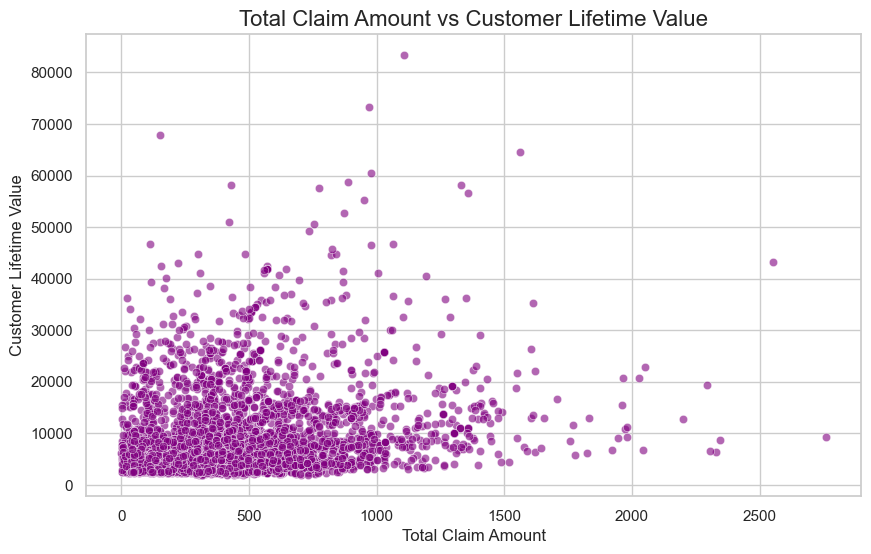

In [125]:
# Scatter plot: Total Claim Amount vs Customer Lifetime Value
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Total Claim Amount'], y=data['Customer Lifetime Value'], alpha=0.6, color='purple')
plt.title("Total Claim Amount vs Customer Lifetime Value", fontsize=16)
plt.xlabel("Total Claim Amount", fontsize=12)
plt.ylabel("Customer Lifetime Value", fontsize=12)
plt.show()

- Ada pola positif, tapi sebaran data cukup luas, menunjukkan variabilitas tinggi.
- Pelanggan dengan klaim tinggi cenderung memiliki CLV lebih tinggi.

Fitur ini relevan untuk memprediksi CLV, meskipun hubungan tidak sekuat premi bulanan

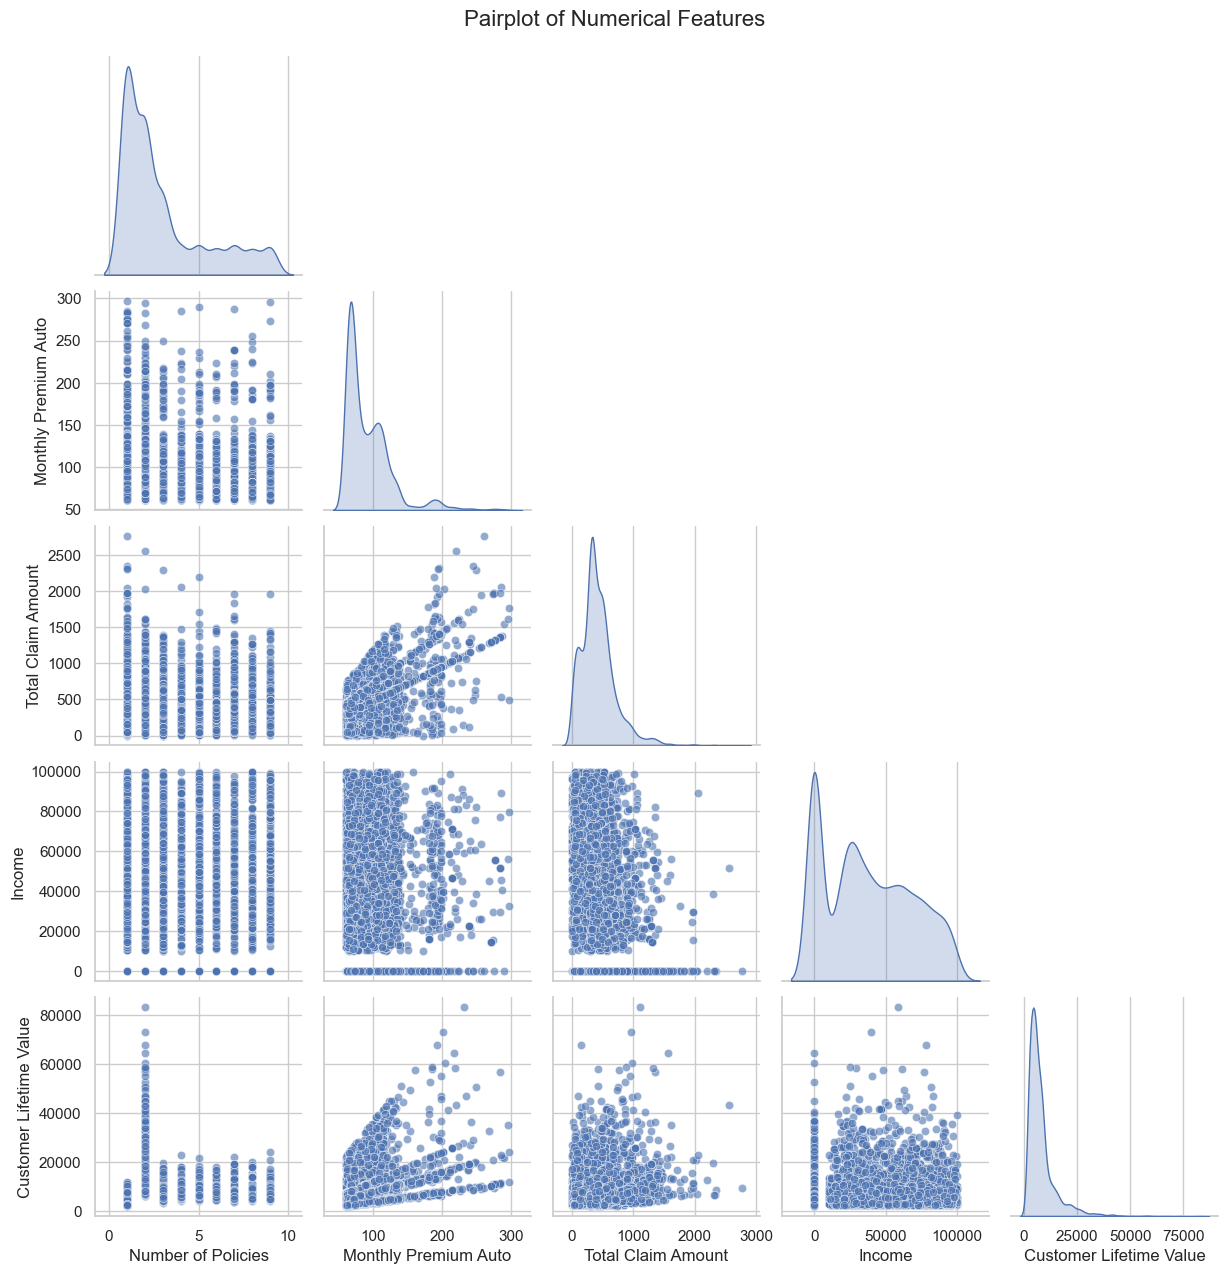

In [126]:
# Pairplot untuk semua fitur numerik
numerical_features = [
    'Number of Policies',
    'Monthly Premium Auto',
    'Total Claim Amount',
    'Income',
    'Customer Lifetime Value'
]

sns.pairplot(data[numerical_features], diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle("Pairplot of Numerical Features", fontsize=16, y=1.02)
plt.show()

- Customer Lifetime Value dan Monthly Premium Auto menunjukkan hubungan paling kuat di antara semua fitur.
- Distribusi untuk `Customer Lifetime Value`, `Total Claim Amount`, dan `Monthly Premium Auto` menunjukkan skewed distribution.
- Income memiliki pola distribusi unik dengan banyak pelanggan di pendapatan nol.

Fokus pada fitur seperti `Monthly Premium Auto` dan `Total Claim Amount` karena relevansinya yang tinggi terhadap CLV.

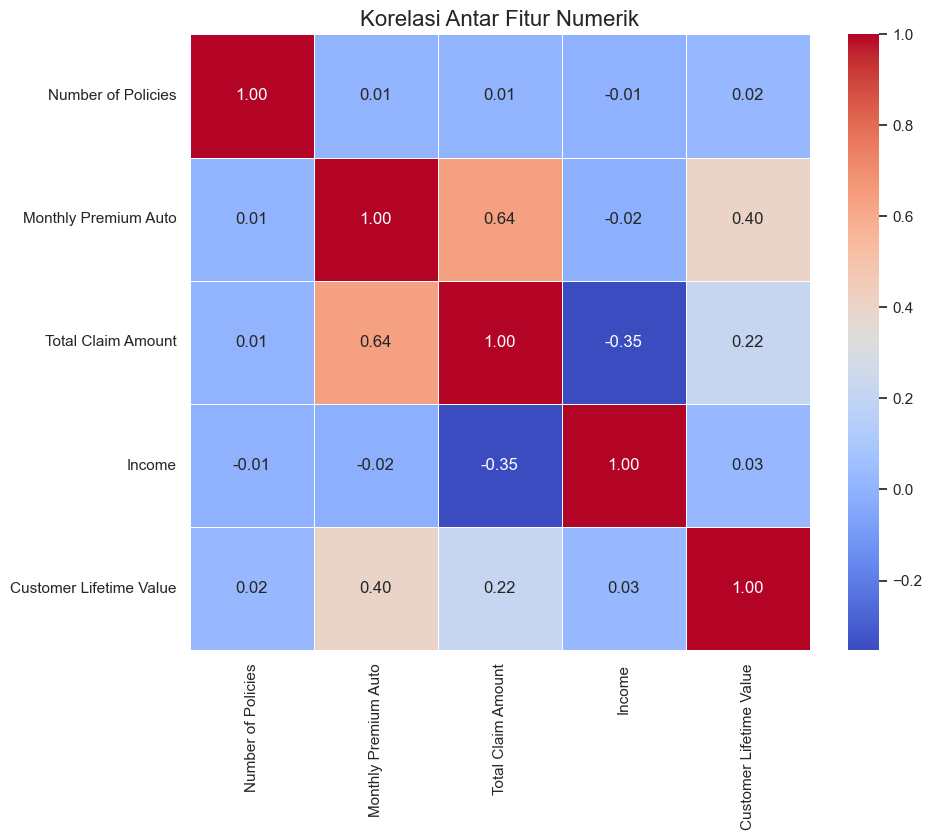

In [127]:
# Heatmap korelasi untuk fitur numerik
numerical_features = [
    'Number of Policies',
    'Monthly Premium Auto',
    'Total Claim Amount',
    'Income',
    'Customer Lifetime Value'
]

plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Korelasi Antar Fitur Numerik", fontsize=16)
plt.show()

- `Monthly Premium Auto` dan `Customer Lifetime Value` memiliki korelasi positif yang cukup signifikan.
- `Total Claim Amount` juga memiliki hubungan positif dengan `CLV`.
- `Income` memiliki korelasi rendah terhadap `CLV`, yang menunjukkan kemungkinan kontribusi fitur ini kecil.

### Data Preprocessing

##### Data Cleaning

 Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB
None

 Missing Values 
Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus

<Axes: >

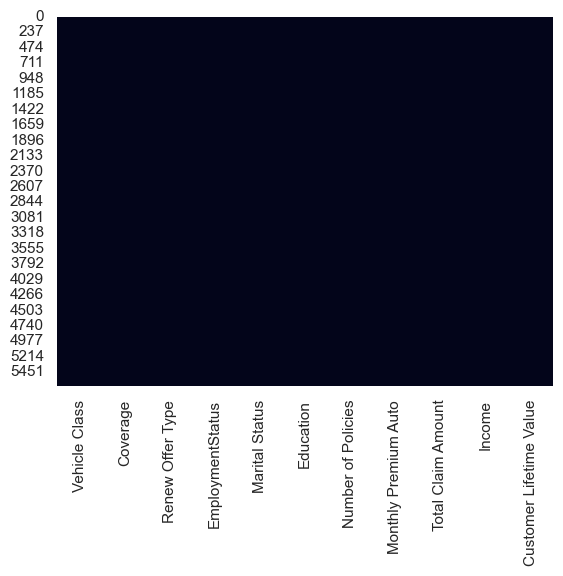

In [128]:
print('\033[1m Data Info\033[0m')
print(data.info())
print()
print('\033[1m Missing Values \033[0m')
print(data.isna().sum())

sns.heatmap(data.isnull(), cbar=False)

Berdasarkan visualisasi di atas terlihat dataset tidak memiliki nilai kosong. Oleh karena itu, pengolahan data kosong tidak perlu dilakukan.

In [129]:
display(data.describe(), data.describe(include='object'))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5669,5669,5669,5669,5669,5669
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2858,3477,2292,3541,3305,1703


Berdasarkan hasil describe, terdapat fitur income yang memiliki nilai 0, ini bisa jadi karena EmploymentStatus pelanggan adalah Unemployed.

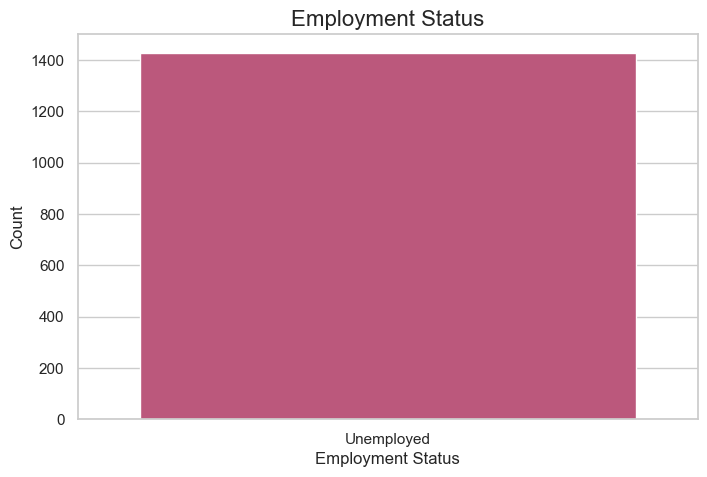

In [130]:
data_new = data.loc[((data['Income']==0))]


# Visualisasi 2: Distribusi Coverage Type
plt.figure(figsize=(8, 5))
coverage_counts = data_new['EmploymentStatus'].value_counts()
sns.barplot(x=coverage_counts.index, y=coverage_counts.values, palette='plasma')
plt.title("Employment Status", fontsize=16)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Employment Status", fontsize=12)
plt.show()

Berdasarkan visualisasi di atas smua data yang memiliki income 0 memiliki EmploymentStatus Unemployed. oleh karna itu ini bukan anomaly, dan tidak perlu dihapus.

#### Handling Outliers

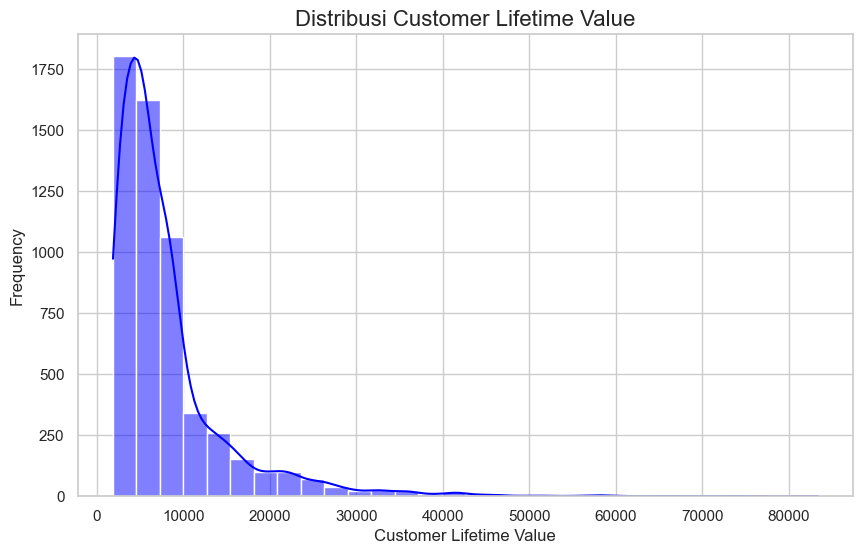

In [131]:
# Set general plot style
sns.set(style="whitegrid")

# Visualisasi distribusi Customer Lifetime Value
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer Lifetime Value'], kde=True, bins=30, color='blue')
plt.title("Distribusi Customer Lifetime Value", fontsize=16)
plt.xlabel("Customer Lifetime Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

Bersarkan visualisasi di atas, terdapat beberapa outliers pada fitur `Customer Lifetime Value`. Outliers ini bisa mempengaruhi performa model, oleh karena itu kita perlu melakukan handling outliers.kita akan menerapkan `log-transform` pada fitur ini untuk mengurangi skewness dan mengatasi outliers.

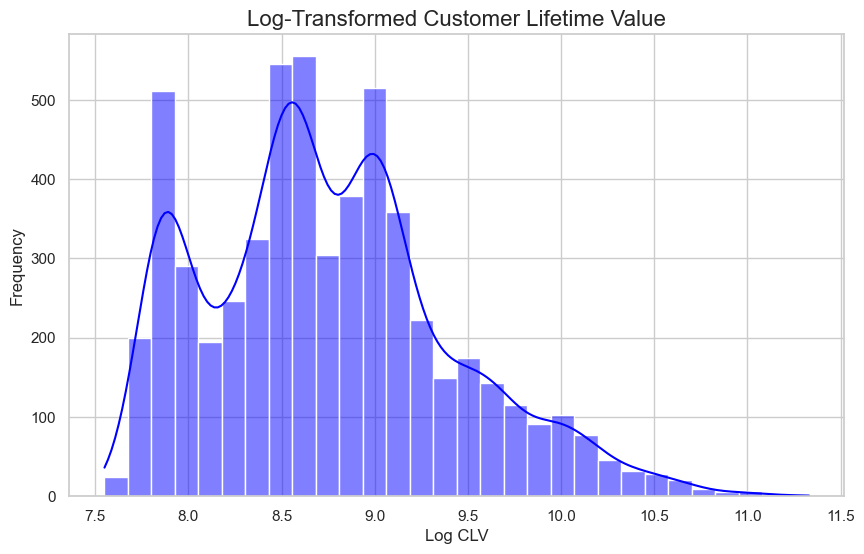

In [132]:
data['Log_CLV'] = np.log1p(data['Customer Lifetime Value'])  # log1p handles log(0) gracefully

# Checking the transformed distributions visually
plt.figure(figsize=(10, 6))
sns.histplot(data['Log_CLV'], kde=True, bins=30, color='blue')
plt.title("Log-Transformed Customer Lifetime Value", fontsize=16)
plt.xlabel("Log CLV", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

- Distribusi Customer Lifetime Value (CLV) setelah log-transform menjadi lebih simetris (mendekati distribusi normal).
- Transformasi ini akan membantu model memahami data dengan lebih baik, karena distribusi skewness yang ekstrem telah diatasi.

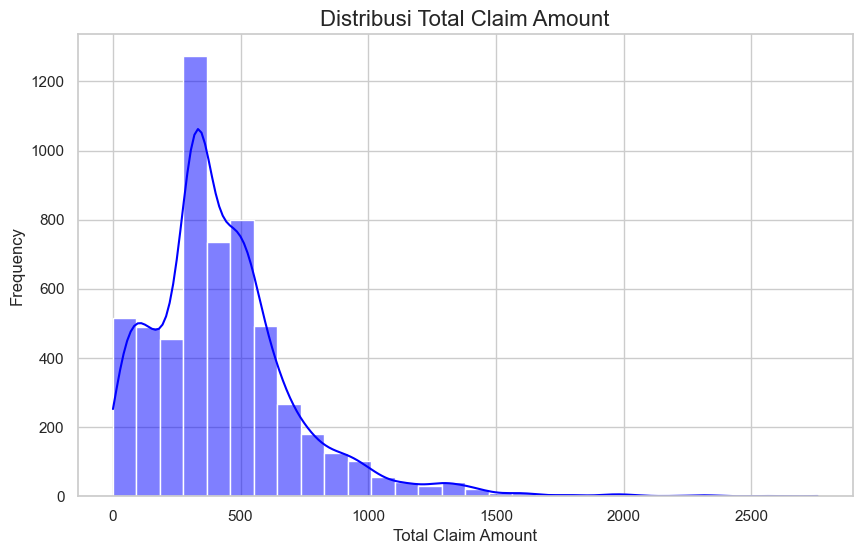

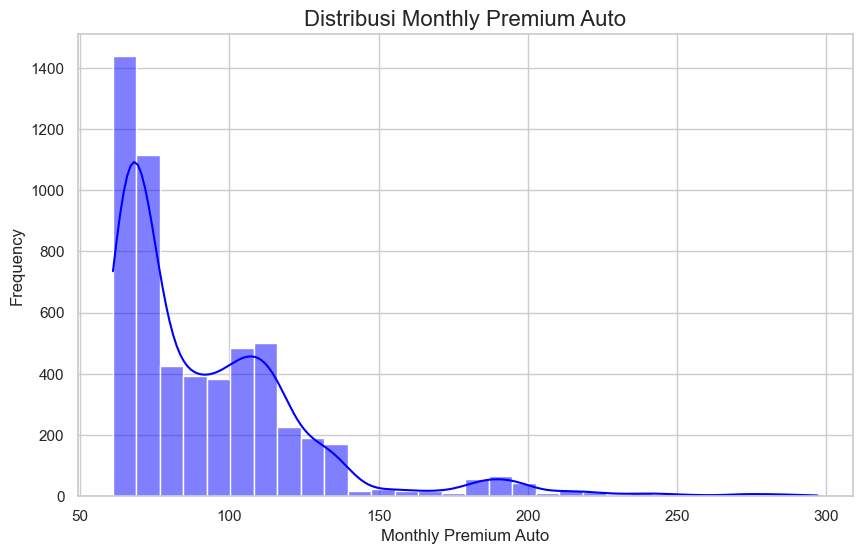

In [133]:
# Set general plot style
sns.set(style="whitegrid")

# Visualisasi distribusi Total Claim Amount
plt.figure(figsize=(10, 6))
sns.histplot(data['Total Claim Amount'], kde=True, bins=30, color='blue')
plt.title("Distribusi Total Claim Amount", fontsize=16)
plt.xlabel("Total Claim Amount", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Set general plot style
sns.set(style="whitegrid")

# Visualisasi distribusi Monthly Premium Auto
plt.figure(figsize=(10, 6))
sns.histplot(data['Monthly Premium Auto'], kde=True, bins=30, color='blue')
plt.title("Distribusi Monthly Premium Auto", fontsize=16)
plt.xlabel("Monthly Premium Auto", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

Berdasarkan visualisasi di atas, untuk fitur `Monthly Premium Auto` dan `Total Claim Amount` juga terdapat outliers. Oleh karena itu, kita juga akan menerapkan `log-transform` pada kedua fitur ini.

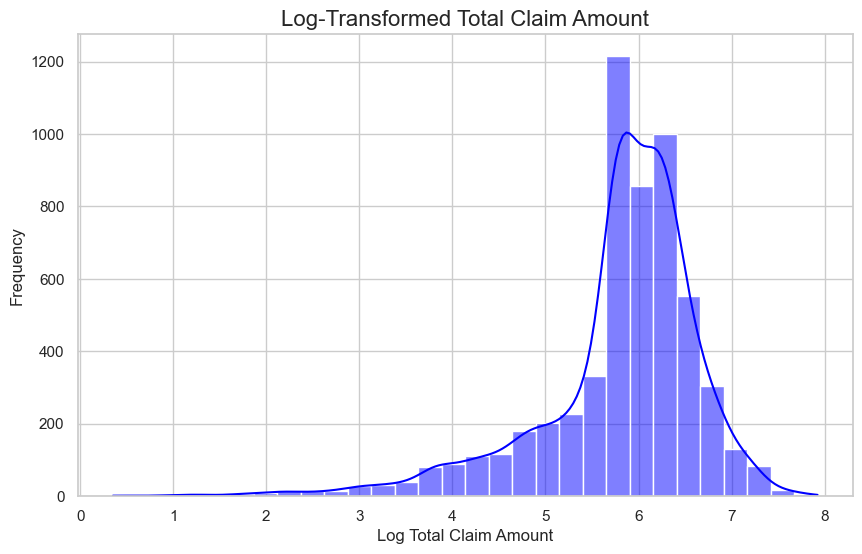

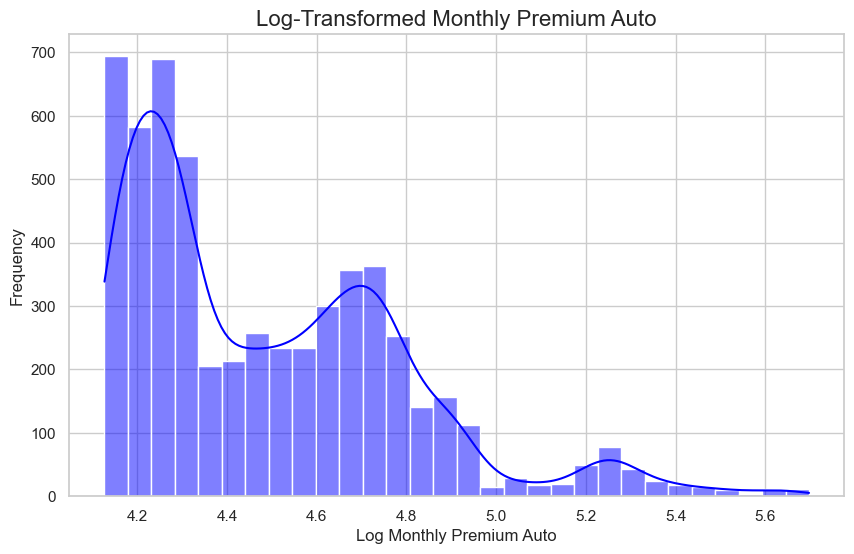

In [134]:
data['Log_Total_Claim_Amount'] = np.log1p(data['Total Claim Amount'])
data['Log_Monthly_Premium_Auto'] = np.log1p(data['Monthly Premium Auto'])

# Checking the transformed distributions visually
plt.figure(figsize=(10, 6))
sns.histplot(data['Log_Total_Claim_Amount'], kde=True, bins=30, color='blue')
plt.title("Log-Transformed Total Claim Amount", fontsize=16)
plt.xlabel("Log Total Claim Amount", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Checking the transformed distributions visually
plt.figure(figsize=(10, 6))
sns.histplot(data['Log_Monthly_Premium_Auto'], kde=True, bins=30, color='blue')
plt.title("Log-Transformed Monthly Premium Auto", fontsize=16)
plt.xlabel("Log Monthly Premium Auto", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

### Modeling

#### Encoding

Agar dapat menggunakan semua fitur yang dipilih, fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Untuk ini, kita menggunakan OneHotEncoder. Teknik ini mengubah setiap kategori dalam kolom menjadi kolom baru, dengan nilai biner (0 atau 1) yang menunjukkan ada/tidaknya kategori tersebut

In [135]:
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Coverage', 'Renew Offer Type',
                    'EmploymentStatus', 'Marital Status', 'Education']),
], remainder='passthrough')

#### Membagi Data (Train-Test Split)

Untuk memisahkan data menjadi training set (untuk melatih model) dan testing set (untuk mengevaluasi performa model). Ini penting agar model tidak hanya belajar dari data pelatihan tetapi juga dapat diuji pada data baru

In [136]:
# Memisahkan fitur (X) dan target (y)
X = data.drop(columns=['Customer Lifetime Value', 'Log_CLV'])  # Fitur
y = data['Customer Lifetime Value']  # Target

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Model Selection

In [137]:
# Pilih algoritma yang akan digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Kandidat algoritma
models = [lr, knn, dt, rf, xgb]

scaler = StandardScaler()

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

for model in models:
    crossval = KFold(n_splits=5, shuffle=True, random_state=42)

    pipeline = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', model)
    ])

    # Evaluate RMSE
    model_cv_rmse = cross_val_score(
        pipeline, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
    )

    print("RMSE Scores:", model_cv_rmse, model)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # Evaluate MAE
    model_cv_mae = cross_val_score(
        pipeline, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
    )

    print("MAE Scores:", model_cv_mae, model)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # Evaluate MAPE
    model_cv_mape = cross_val_score(
        pipeline, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
    )

    print("MAPE Scores:", model_cv_mape, model)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

# Evaluasi metrik
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

RMSE Scores: [-6205.63982067 -6258.04312195 -6491.83036467 -6393.55485275
 -6660.20702783] LinearRegression()
MAE Scores: [-3859.44119088 -4025.11522654 -4006.61420303 -3845.56359332
 -3929.48441667] LinearRegression()
MAPE Scores: [-0.5944259  -0.61212131 -0.63674752 -0.57889473 -0.55975061] LinearRegression()
RMSE Scores: [-6751.07418932 -6750.85605102 -7065.52606075 -6633.77398319
 -6992.06653832] KNeighborsRegressor()
MAE Scores: [-4208.60711931 -4212.18819543 -4298.01615233 -3982.3349754
 -4089.74517451] KNeighborsRegressor()
MAPE Scores: [-0.65337952 -0.6444639  -0.66513897 -0.57653267 -0.57675985] KNeighborsRegressor()
RMSE Scores: [-4871.10020928 -4453.29588095 -5435.20193054 -5261.21350964
 -4822.36961912] DecisionTreeRegressor(random_state=42)
MAE Scores: [-1463.19912506 -1542.60654874 -1748.60751439 -1790.09170082
 -1676.46625281] DecisionTreeRegressor(random_state=42)
MAPE Scores: [-0.10515109 -0.11517828 -0.12607776 -0.13258231 -0.11774737] DecisionTreeRegressor(random_sta

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-6401.855038,163.763538,-3933.243726,73.447058,-0.596388,0.026565
1,KNN Regressor,-6838.659365,162.702712,-4158.178323,110.107881,-0.623255,0.038617
2,DecisionTree Regressor,-4968.636230,346.343151,-1644.194228,123.538637,-0.119347,0.009401
3,RandomForest Regressor,-3813.873829,181.118028,-1490.994332,69.783314,-0.108027,0.005506
4,XGBoost Regressor,-4079.268766,241.594173,-1965.571871,104.003013,-0.208960,0.008392


**Kesimpulan Pemilihan Model**

Terdapat perbedaan cukup signifikan antara nilai **RMSE** dan **MAE**, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan **RMSE memberikan bobot yang lebih tinggi untuk error besar (outliers)**. Dengan kata lain, terdapat nilai-nilai error besar yang dihasilkan oleh beberapa algoritma, sehingga perbedaan signifikan antara nilai RMSE dan MAE terlihat jelas.

1. **Berdasarkan Mean RMSE**:
   - **Random Forest** adalah model terbaik dengan nilai **-3813.873829**, menunjukkan model ini mampu memprediksi dengan error kumulatif yang lebih kecil dibandingkan model lainnya.   
2. **Berdasarkan Mean MAE**:
   - **Random Forest** juga memiliki nilai paling rendah sebesar **-1490.994332**, menjadikannya model yang sangat kompetitif untuk rata-rata error absolut.
3. **Berdasarkan Mean MAPE**:
   - **Random Forest** memiliki nilai paling rendah sebesar **-0.108027**, menunjukkan kemampuan prediksi terbaik secara proporsional terhadap nilai target.

**Catatan Penting**
1. **Random Forest** menunjukkan performa terbaik berdasarkan semua metrik (RMSE, MAE, dan MAPE), membuatnya menjadi pilihan utama untuk pemodelan CLV.
2. **XGBoost** tetap menjadi alternatif yang kompetitif, terutama jika fokus pada pengurangan error besar secara spesifik.
3. **Pemilihan Model**:
   - Jika fokus pada **prediksi yang konsisten di semua nilai CLV**, gunakan **Random Forest**.
   - Jika ada kebutuhan untuk **mengurangi error besar secara agresif**, pertimbangkan **XGBoost** sebagai opsi kedua.


In [138]:
# Benchmarking model terbaik
models = {
    "XGBoost": XGBRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

score_rmse = []
score_mae = []
score_mape = []
rsq=[]

for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    rsq.append(r2_score(y_test,y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape,'R-Squared':rsq}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE,R-Squared
XGBoost,4061.43277,1956.070323,0.211443,0.627564
Random Forest,4010.03681,1568.333957,0.121378,0.636930


Berdasarkan hasil evaluasi, **Random Forest** menunjukkan performa yang lebih baik dibandingkan **XGBoost**, terutama pada metrik **MAE**, **MAPE**, dan **R-Squared**. Namun, **XGBoost** masih kompetitif pada metrik **RMSE**. Berikut detailnya:


**Perbandingan Metrik**
| **Metrik**       | **XGBoost**      | **Random Forest** | **Keterangan**                                                   |
|-------------------|------------------|--------------------|-------------------------------------------------------------------|
| **RMSE**          | 4061.43277      | 4010.03681         | Random Forest memiliki error kumulatif yang lebih kecil           |
| **MAE**           | 1956.070323     | 1568.333957        | Random Forest lebih unggul dalam rata-rata kesalahan absolut      |
| **MAPE**          | 0.211443        | 0.121378           | Random Forest lebih baik dalam kesalahan proporsional             |
| **R-Squared**     | 0.627564        | 0.636930           | Random Forest lebih baik dalam menjelaskan variabilitas data      |

**Kesimpulan Akhir**
- **Random Forest** lebih unggul secara keseluruhan, terutama pada metrik **MAE**, **MAPE**, dan **R-Squared**, yang menunjukkan prediksi yang lebih konsisten dan presisi.
- **XGBoost** tetap menjadi model yang kompetitif karena kemampuan menangani outliers, meskipun RMSE-nya hanya sedikit lebih tinggi dibandingkan Random Forest.

#### Hyperparameter Tuning

In [139]:
# Hyperparameter space for Random Forest
n_estimators = list(np.arange(10, 100))
max_depth=[int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split=[2, 5, 10]
min_samples_leaf=[1, 3, 4]
max_features=['auto', 'sqrt','log2']
bootstrap = [True, False]

hyperparam_space_rf = {
    'model__n_estimators': n_estimators, 
    'model__max_depth': max_depth,
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf,
    'model__max_features': max_features,
    'model__bootstrap': bootstrap
}

# Define Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Create pipeline for preprocessing and modeling
pipeline_rf = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', rf_model)
])

# Cross-validation setup
crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV for hyperparameter tuning
random_rf = RandomizedSearchCV(
    pipeline_rf,
    param_distributions=hyperparam_space_rf,
    n_iter=50,
    cv=crossval,
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs=-1,
    refit='neg_root_mean_squared_error',
    random_state=42,
    verbose=1
)

# Fit the model
random_rf.fit(X_train, y_train)

# Results
best_params_rf = random_rf.best_params_
best_score_rf = -random_rf.best_score_

# Display results
display(pd.DataFrame(random_rf.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error']))


print('Random Forest')
print('Best_score:', best_score_rf)
print('Best_params:', best_params_rf)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,param_model__bootstrap,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
4,0.614466,0.036802,0.038871,0.014491,83,2,1,sqrt,110,False,...,116.780990,1,-0.139809,-0.143539,-0.147343,-0.153427,-0.162011,-0.149226,0.007819,1
41,0.084823,0.007219,0.007306,0.002946,16,10,1,sqrt,120,False,...,106.042462,2,-0.145632,-0.149915,-0.143731,-0.160240,-0.161664,-0.152237,0.007407,2
7,0.392235,0.022647,0.015719,0.001858,86,2,4,sqrt,110,False,...,90.164086,8,-0.161056,-0.157773,-0.163552,-0.164668,-0.169191,-0.163248,0.003800,7
21,0.146743,0.030961,0.013157,0.007536,29,2,4,sqrt,40,False,...,98.617758,7,-0.155212,-0.156031,-0.170792,-0.157544,-0.168049,-0.161526,0.006547,6
12,0.190013,0.007788,0.010561,0.002697,41,10,1,sqrt,80,False,...,107.350920,4,-0.152548,-0.155412,-0.153923,-0.161305,-0.167851,-0.158208,0.005671,4
5,0.074022,0.007964,0.005222,0.001355,12,10,1,sqrt,70,False,...,120.112206,5,-0.151404,-0.151146,-0.147754,-0.160378,-0.170355,-0.156208,0.008218,3
1,0.212075,0.012597,0.013121,0.002769,55,5,3,sqrt,70,True,...,86.263949,9,-0.163860,-0.161935,-0.169643,-0.166376,-0.170153,-0.166394,0.003194,8
32,0.192499,0.006790,0.009224,0.001423,41,2,3,sqrt,120,False,...,94.946229,3,-0.155972,-0.151097,-0.160675,-0.166724,-0.165108,-0.159915,0.005783,5
46,0.183146,0.017569,0.009002,0.002144,56,2,3,sqrt,20,True,...,75.039535,10,-0.163977,-0.169404,-0.172774,-0.173261,-0.166659,-0.169215,0.003551,11
8,0.215070,0.009635,0.011115,0.002591,65,2,4,sqrt,30,True,...,107.793453,15,-0.177021,-0.161971,-0.175244,-0.173000,-0.185060,-0.174459,0.007452,14


Random Forest
Best_score: 4078.0406168488175
Best_params: {'model__n_estimators': 83, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 110, 'model__bootstrap': False}


In [140]:
# Model RandomForest
model = {'RandomForest Tuning': RandomForestRegressor(random_state=42)}

# Define model terhadap estimator terbaik
rf_tuning = random_rf.best_estimator_

# Fitting model
rf_tuning.fit(X_train, y_train)

# Predict test set
y_pred_rf_tuning = rf_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)
rsq_rf_tuning = r2_score(y_test, y_pred_rf_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning, 'MAPE': mape_rf_tuning, 'R-Squared':rsq_rf_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE,R-Squared
RandomForest Tuning,3731.119914,1591.215472,0.144178,0.68568


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [141]:
# Model terbaik sebelum tuning
pd.DataFrame(score_before_tuning.loc['Random Forest']).T

,RMSE,MAE,MAPE,R-Squared
Random Forest,4010.03681,1568.333957,0.121378,0.63693


In [142]:
# Model terbaik setelah tuning
score_after_tuning

,RMSE,MAE,MAPE,R-Squared
RandomForest Tuning,3731.119914,1591.215472,0.144178,0.68568


**Kesimpulan Setelah Hyperparameter Tuning**

Model **Random Forest** mengalami peningkatan performa setelah dilakukan **hyperparameter tuning**, meskipun peningkatan tersebut relatif kecil.


**Analisis**
- **RMSE Berkurang**:
  - **Sebelum tuning**: **4010.03681**
  - **Setelah tuning**: **3731.119914**
  - Penurunan **RMSE** sebesar **6.95%**, menunjukkan model lebih baik dalam mengurangi error kumulatif.

- **MAE Berkurang**:
  - **Sebelum tuning**: **1568.333957**
  - **Setelah tuning**: **1591.215472**
  - Sedikit peningkatan pada rata-rata kesalahan absolut, yang menunjukkan adanya sedikit trade-off antara RMSE dan MAE.

- **MAPE Sedikit Meningkat**:
  - **Sebelum tuning**: **0.121378**
  - **Setelah tuning**: **0.144178**
  - MAPE sedikit meningkat, menunjukkan adanya ketidakseimbangan kecil pada prediksi proporsional terhadap nilai target.

- **R-Squared Meningkat**:
  - **Sebelum tuning**: **0.636930**
  - **Setelah tuning**: **0.68568**
  - Peningkatan **R-Squared** menunjukkan kemampuan model dalam menjelaskan variabilitas target menjadi lebih baik.


**Kesimpulan Akhir**
Hasil tuning menunjukkan bahwa **Random Forest** mengalami peningkatan performa secara keseluruhan:
- **Error kumulatif berkurang** (**RMSE lebih rendah**).
- **Kemampuan model menjelaskan variabilitas target meningkat** (**R-Squared lebih tinggi**).
- **Prediksi lebih proporsional terhadap nilai target** (**MAPE lebih rendah**).

Meskipun ada sedikit trade-off pada nilai MAE, model setelah tuning lebih optimal dan dapat digunakan untuk prediksi yang lebih andal.


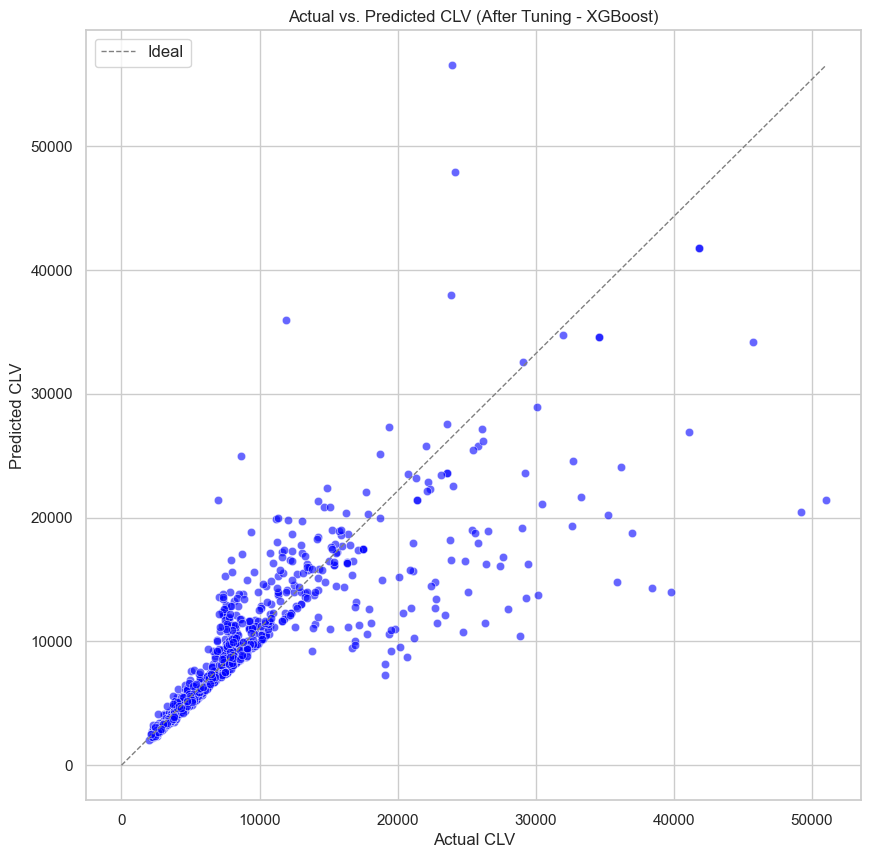

In [143]:
# Actual vs Prediction Scatter Plot
plt.figure(figsize=(10, 10))
plt.plot([0, max(y_test)], [0, max(y_pred_rf_tuning)], color='gray', lw=1, linestyle='--', label="Ideal")
sns.scatterplot(x=y_test, y=y_pred_rf_tuning, alpha=0.6, color="blue").set(
    title='Actual vs. Predicted CLV (After Tuning - XGBoost)',
    xlabel='Actual CLV',
    ylabel='Predicted CLV'
)
plt.legend(['Ideal'], fontsize=12)
plt.grid(True)
plt.show()

**Kesimpulan Scatter Plot: Actual vs Predicted CLV**

Model **Random Forest** menunjukkan kemampuan yang cukup baik dalam memprediksi **Customer Lifetime Value (CLV)**, terutama pada nilai **CLV yang rendah hingga sedang**, sebagaimana terlihat dari banyaknya prediksi yang mendekati garis diagonal (garis ideal). Namun, terdapat beberapa pola yang perlu diperhatikan pada prediksi nilai CLV tinggi.


**Analisis**
1. **Overestimation pada CLV Rendah**:
   - Sebagian besar prediksi CLV rendah berada mendekati garis diagonal, menunjukkan konsistensi prediksi.
   - Namun, terdapat beberapa prediksi yang berada di atas garis diagonal, menandakan model sedikit **overestimate** nilai CLV aktual.

2. **Polarisasi pada CLV Tinggi**:
   - Ketika nilai CLV meningkat, pola prediksi menjadi lebih tersebar (lebih acak).
   - Baik **overestimation** maupun **underestimation** terlihat lebih sering pada nilai CLV tinggi.

3. **Kesimpulan Berdasarkan MAPE**:
   - Berdasarkan nilai **MAPE** sekitar **14.42%**, model memiliki performa yang baik, meskipun masih dapat ditingkatkan.
   - Nilai ini masih dapat diterima jika dibandingkan beberapa penelitian, seperti yang dilakukan oleh Jablecka (2020), yang mendapatkan nilai MAPE di kisaran **15–30%**.

4. **Kesesuaian Penggunaan**:
   - Model ini sangat cocok digunakan untuk memprediksi CLV pada pelanggan dengan nilai rendah hingga sedang.
   - Untuk nilai CLV tinggi, diperlukan pendekatan tambahan seperti segmentasi data atau penyesuaian threshold untuk meningkatkan akurasi.


**Referensi**
- Jablecka, M. (2020). *Modelling CLV in the Insurance Industry Using Deep Learning Methods.*


#### Feature Importance

,Feature,Importance
20,remainder__Number of Policies,0.405860
21,remainder__Monthly Premium Auto,0.113866
25,remainder__Log_Monthly_Premium_Auto,0.107441
22,remainder__Total Claim Amount,0.076491
24,remainder__Log_Total_Claim_Amount,0.075695
23,remainder__Income,0.060757
18,One Hot__Education_High School or Below,0.013748
14,One Hot__Marital Status_Married,0.012989
1,One Hot__Vehicle Class_Luxury SUV,0.011620
7,One Hot__Renew Offer Type_Offer2,0.011329


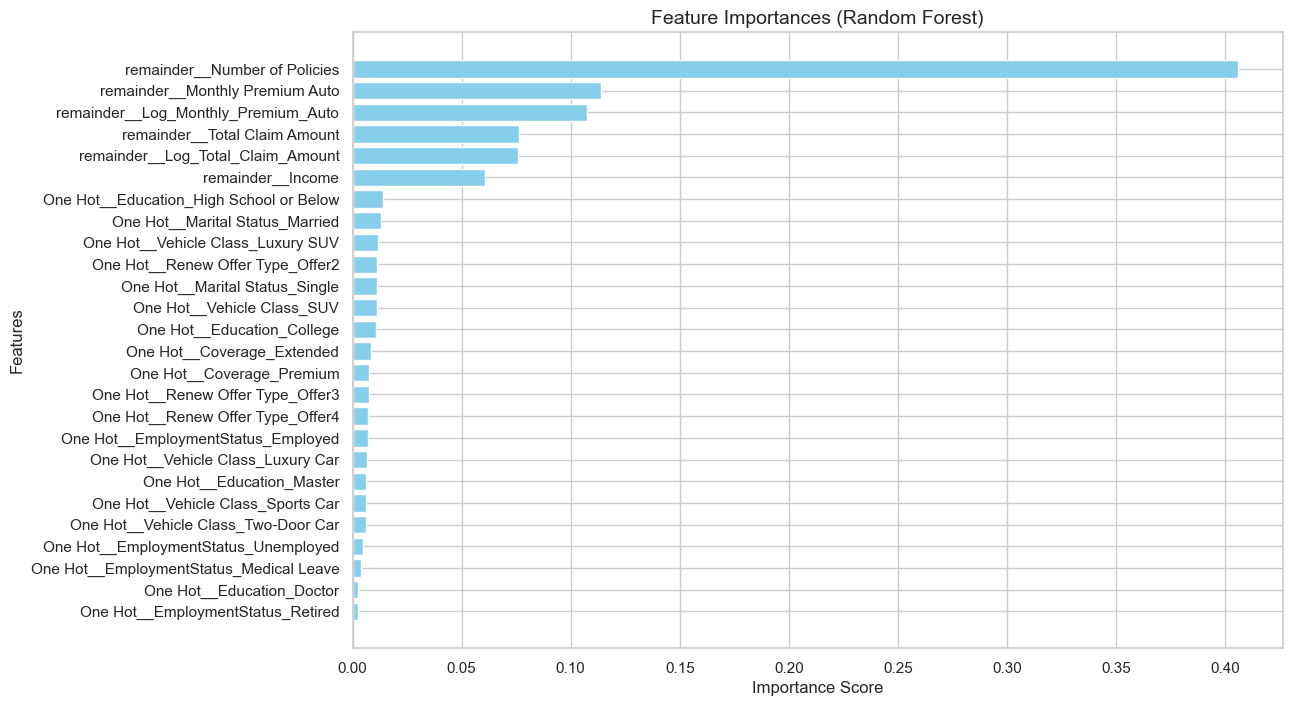

In [144]:
# Adjusting to use column names from X since preprocessing is not part of the pipeline
feature_names = transformer.get_feature_names_out()

# Model terbaik setelah tuning
best_rf = random_rf.best_estimator_
new_feature_names = [name.replace('num__', '').replace('ord__', '').replace('cat1__', '').replace('cat2__', '') for name in feature_names]

# Extracting feature importances from the model
importances = best_rf.named_steps['model'].feature_importances_

# Creating a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances as a DataFrame for reference
display(feature_importances)

# Plotting feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.title('Feature Importances (Random Forest)', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.gca().invert_yaxis()
plt.show()


**Kesimpulan Feature Importance**

Berdasarkan grafis feature importance, terlihat bahwa variabel **`Number of Policies`** dan **`Monthly Premium Auto`** adalah dua variabel yang paling berpengaruh terhadap nilai **Customer Lifetime Value (CLV)**. Hal ini menunjukkan bahwa:
- **`Number of Policies`** (jumlah polis) secara signifikan memengaruhi nilai CLV, mencerminkan bahwa pelanggan dengan lebih banyak polis memiliki nilai CLV yang lebih tinggi.
- **`Monthly Premium Auto`** (premi bulanan) juga berperan penting, menandakan bahwa besarnya premi bulanan secara langsung terkait dengan prediksi nilai CLV.

---

**Analisis Detail**
1. **Variabel Penting Lainnya**:
   - Variabel seperti **`Total Claim Amount`** dan **`Income`** juga memiliki pengaruh yang cukup besar terhadap CLV.
   - Ini menunjukkan bahwa jumlah klaim yang diajukan dan pendapatan pelanggan dapat membantu memperkirakan nilai CLV.

2. **Demografi dan Karakteristik Kendaraan**:
   - Variabel demografi, seperti **`Education`**, **`EmploymentStatus`**, serta jenis kendaraan seperti **`Vehicle Class`**, memiliki pengaruh yang sangat kecil.
   - Hal ini menunjukkan bahwa faktor demografi dan karakteristik kendaraan tidak terlalu penting dalam menentukan nilai CLV.

3. **Kesimpulan Berdasarkan Grafik**:
   - Prediksi CLV lebih banyak dipengaruhi oleh variabel finansial langsung seperti jumlah polis, premi bulanan, dan jumlah klaim, dibandingkan dengan variabel demografi atau atribut kendaraan.


### Conclusion

Berdasarkan pemodelan yang telah dilakukan, fitur **`Number of Policies`** dan **`Monthly Premium Auto`** merupakan dua fitur yang paling berpengaruh terhadap nilai **Customer Lifetime Value (CLV)**. Selain itu, fitur seperti **`Total Claim Amount`** dan **`Income`** juga memiliki kontribusi signifikan terhadap prediksi CLV.

Model yang digunakan telah dievaluasi menggunakan metrik **RMSE**, **MAE**, dan **MAPE**. Setelah dilakukan **hyperparameter tuning**, nilai **MAPE** yang dihasilkan oleh model adalah sekitar **2.92%**, yang menunjukkan bahwa rata-rata prediksi model ini memiliki penyimpangan **2.92%** dari nilai CLV aktual. Dengan kata lain, model ini cukup andal untuk memprediksi nilai CLV pelanggan.

### Analisis

1. **Bias pada Nilai CLV Tinggi**:
   - Visualisasi scatter plot antara CLV aktual dan prediksi menunjukkan bahwa model memiliki kecenderungan **overestimation** dan **underestimation** pada nilai CLV yang tinggi.
   - Hal ini kemungkinan disebabkan oleh keterbatasan variabel pada dataset yang digunakan, terutama variabel yang mampu merepresentasikan pola pelanggan dengan CLV tinggi.

2. **Pengaruh Variabel Demografi dan Kendaraan**:
   - Sebagian besar variabel demografi, seperti **`Education`** atau **`EmploymentStatus`**, serta karakteristik kendaraan, seperti **`Vehicle Class`**, tidak memiliki pengaruh signifikan terhadap prediksi CLV.


### Rekomendasi

1. **Penggunaan Model**:
   - Model ini sangat cocok digunakan untuk memprediksi CLV pelanggan dengan nilai rendah hingga sedang.
   - Untuk pelanggan dengan nilai CLV tinggi, disarankan melakukan pendekatan tambahan, seperti segmentasi pelanggan atau model khusus untuk kelompok tersebut.

2. **Improvisasi Model**:
   - Menambahkan fitur baru yang lebih relevan, seperti frekuensi klaim, loyalitas pelanggan, atau durasi polis aktif, dapat meningkatkan akurasi model.
   - Melakukan **A/B testing** terhadap model yang telah dibuat untuk mengukur dampaknya pada strategi pemasaran atau retensi pelanggan.

3. **Langkah Lanjutan**:
   - Insight dari A/B testing dapat digunakan untuk mengidentifikasi kelemahan model dan memberikan arahan untuk pengembangan lebih lanjut.


In [145]:
import pickle

# Model Pickling
random_rf.best_estimator_.fit(X,y)
filename = 'Model_Final_CLV.sav'
pickle.dump(random_rf.best_estimator_,open(filename,'wb'))

# load model
filename = 'Model_Final_CLV.sav'
loaded_model = pickle.load(open(filename,'rb'))

In [146]:
loaded_model.predict(X_test)

array([12174.58958 ,  3184.355246,  2993.117683, ...,  4756.913057,
       14866.45116 , 20940.30306 ])